# Using Machine Learning

## INITIALISATION


In [179]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ta.momentum import RSIIndicator
from ta.trend import MACD
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import os
import warnings
warnings.filterwarnings("ignore")

In [180]:
symbols = ["RELIANCE.NS", "HDFCBANK.NS", "INFY.NS"]

In [181]:
for symbol in symbols:   
    stock = yf.Ticker(symbol)
    info = stock.info
    print(f"Symbol: {symbol}")
    print(f"Name: {info.get('shortName', 'N/A')}")
    print(f"Market: {info.get('market', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print("-" * 30)

Symbol: RELIANCE.NS
Name: RELIANCE INDUSTRIES LTD
Market: in_market
Sector: Energy
------------------------------
Symbol: HDFCBANK.NS
Name: HDFC BANK LTD
Market: in_market
Sector: Financial Services
------------------------------
Symbol: INFY.NS
Name: INFOSYS LIMITED
Market: in_market
Sector: Technology
------------------------------


## DATA VISUALISATION


Historical Data for HDFCBANK.NS for the last 6 months:
+---------------------------+----------+----------+----------+----------+-------------+-------------+----------------+
| Date                      |     Open |     High |      Low |    Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+----------+----------+----------+----------+-------------+-------------+----------------|
| 2020-08-03 00:00:00+05:30 |  974.173 |  975.123 |  942.886 |  951.432 | 1.58918e+07 |           0 |              0 |
| 2020-08-04 00:00:00+05:30 |  957.129 | 1007.5   |  952.381 |  989.081 | 3.01531e+07 |           0 |              0 |
| 2020-08-05 00:00:00+05:30 |  995.063 | 1002.52  |  968.523 |  975.692 | 1.66107e+07 |           0 |              0 |
| 2020-08-06 00:00:00+05:30 |  984.665 | 1001.76  |  974.458 |  988.179 | 1.68234e+07 |           0 |              0 |
| 2020-08-07 00:00:00+05:30 |  982.624 |  994.351 |  969.093 |  991.17  | 1.24184e+07 |           0 |           

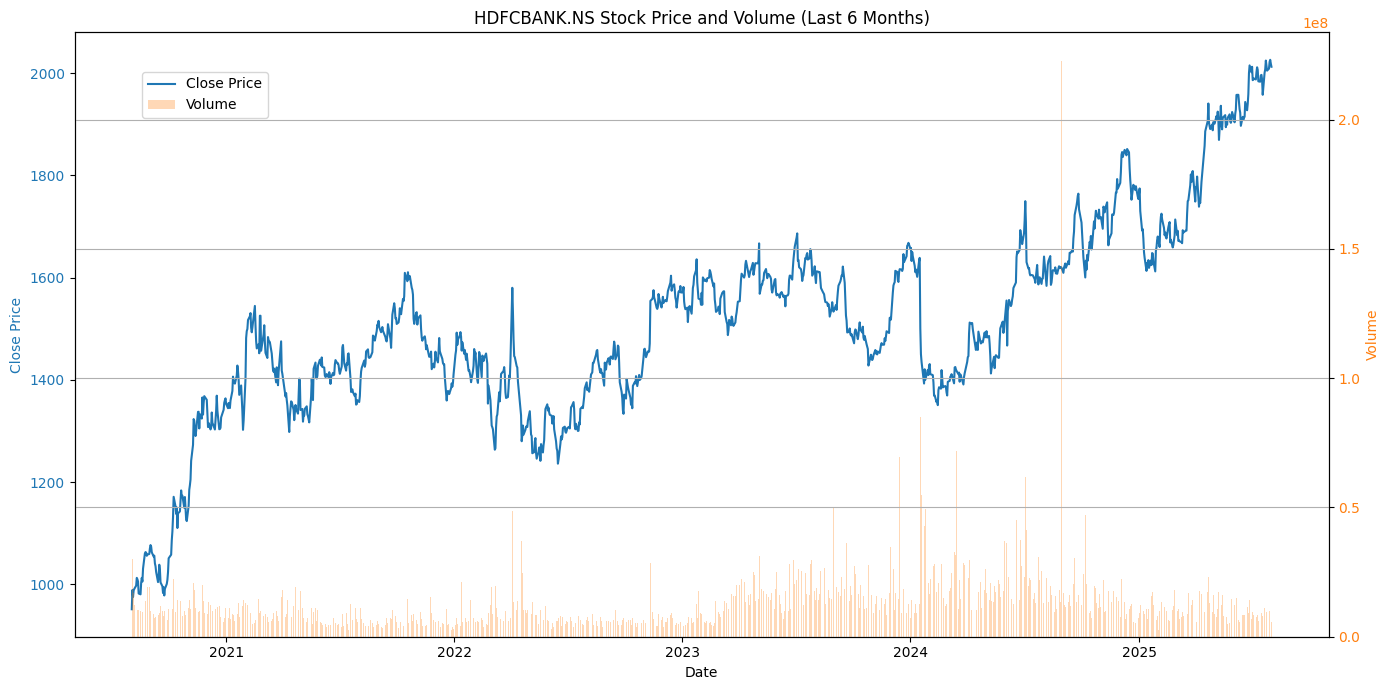

In [182]:
#we will fetch data for the last 6 months for each stock and plot the close price and volume
symbol = 'HDFCBANK.NS'
period = '5y'  

stock = yf.Ticker(symbol)
data = stock.history(period=period)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} for the last 6 months:")
formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))


# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title(f'{symbol} Stock Price and Volume (Last 6 Months)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()

Historical Data for RELIANCE.NS for the last 6 months:
+---------------------------+----------+----------+----------+----------+-------------+-------------+----------------+
| Date                      |     Open |     High |      Low |    Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+----------+----------+----------+----------+-------------+-------------+----------------|
| 2020-08-03 00:00:00+05:30 |  933.838 |  936.433 |  911.896 |  914.582 | 4.67154e+07 |           0 |              0 |
| 2020-08-04 00:00:00+05:30 |  919.862 |  986.51  |  910.598 |  979.044 | 9.20411e+07 |           0 |              0 |
| 2020-08-05 00:00:00+05:30 |  987.42  |  999.712 |  964.34  |  968.05  | 7.455e+07   |           0 |              0 |
| 2020-08-06 00:00:00+05:30 |  981.957 |  986.829 |  959.56  |  971.532 | 4.9323e+07  |           0 |              0 |
| 2020-08-07 00:00:00+05:30 |  969.575 |  982.322 |  965.205 |  977.155 | 3.29844e+07 |           0 |           

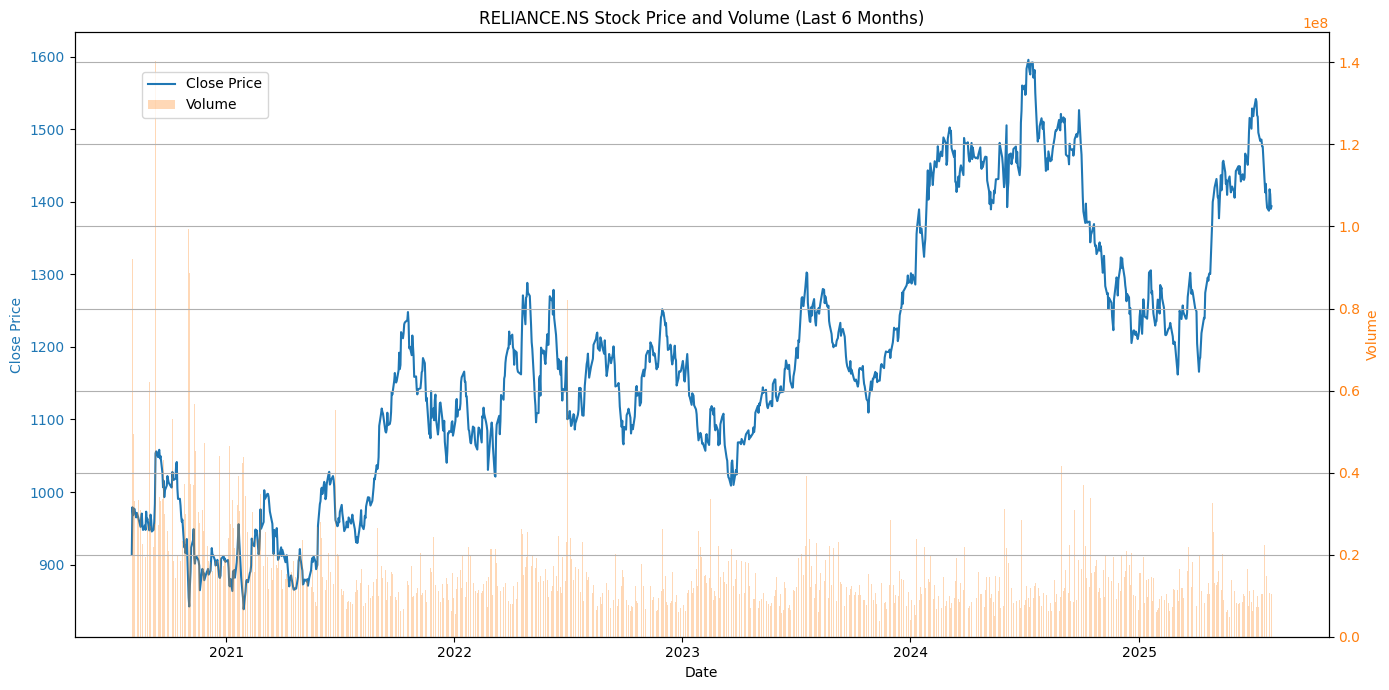

In [183]:
#we will fetch data for the last 6 months for each stock and plot the close price and volume
symbol = 'RELIANCE.NS'
period = '5y'  

stock = yf.Ticker(symbol)
data = stock.history(period=period)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} for the last 6 months:")
formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))


# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title(f'{symbol} Stock Price and Volume (Last 6 Months)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()

Historical Data for INFY.NS for the last 6 months:
+---------------------------+----------+----------+----------+----------+-------------+-------------+----------------+
| Date                      |     Open |     High |      Low |    Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+----------+----------+----------+----------+-------------+-------------+----------------|
| 2020-08-03 00:00:00+05:30 |  853.778 |  858.581 |  842.617 |  851.021 | 8.47979e+06 |           0 |              0 |
| 2020-08-04 00:00:00+05:30 |  854.179 |  863.294 |  836.48  |  844.751 | 1.11332e+07 |           0 |              0 |
| 2020-08-05 00:00:00+05:30 |  846.664 |  854.623 |  834.479 |  840.171 | 9.61418e+06 |           0 |              0 |
| 2020-08-06 00:00:00+05:30 |  847.998 |  866.585 |  838.215 |  863.428 | 1.09765e+07 |           0 |              0 |
| 2020-08-07 00:00:00+05:30 |  862.183 |  862.183 |  843.995 |  845.685 | 8.01095e+06 |           0 |              0

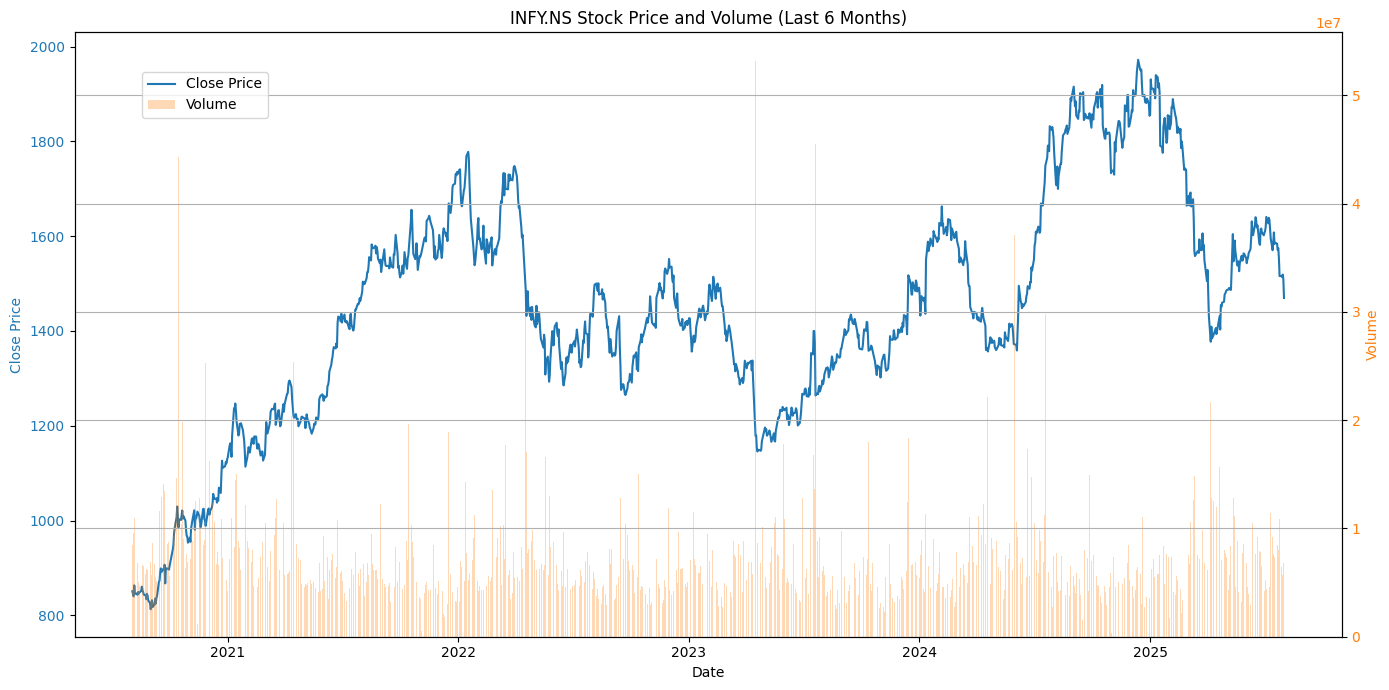

In [184]:
#we will fetch data for the last 6 months for each stock and plot the close price and volume
symbol = 'INFY.NS'
period = '5y'  

stock = yf.Ticker(symbol)
data = stock.history(period=period)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} for the last 6 months:")
formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))


# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title(f'{symbol} Stock Price and Volume (Last 6 Months)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()

## PREPROCESSING THE DATA

In [185]:
from ta.momentum import RSIIndicator
from ta.trend import MACD
import pandas as pd

def preprocess_stock(df):
    df = df.copy()

    # --- Technical Indicators ---
    df["RSI"] = RSIIndicator(df["Close"], window=14).rsi()
    df["MACD"] = MACD(df["Close"]).macd()
    df["MACD_Signal"] = MACD(df["Close"]).macd_signal()
    df["SMA_20"] = df["Close"].rolling(window=20).mean()
    df["SMA_50"] = df["Close"].rolling(window=50).mean()
    df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()
    df["Volatility"] = df["Close"].rolling(window=10).std()
    df["Volume"] = df["Volume"]

    # --- Strategy Logic ---
    df["Buy_Signal"] = (
        (df["RSI"] < 30) &
        (df["SMA_20"] > df["SMA_50"]) &
        (df["SMA_20"].shift(1) <= df["SMA_50"].shift(1))
    ).astype(int)

    # --- Target for ML ---
    df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

    return df.dropna()

In [186]:
symbol_infy = 'INFY.NS'
print(f"Preprocessed data for {symbol_infy}")
data_infy = yf.Ticker(symbol_infy).history(period='5y')
processed_infy = preprocess_stock(data_infy)
processed_infy.head()

Preprocessed data for INFY.NS


,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,MACD_Signal,SMA_20,SMA_50,EMA_20,Volatility,Buy_Signal,Target
Date,,,,,,,,,,,,,,,,
2020-10-12 00:00:00+05:30,998.742912,1013.861905,989.048948,1006.835999,14633537,0.0,0.0,80.696612,32.531500,22.709181,913.749634,869.566145,919.858155,39.756059,0,1
2020-10-13 00:00:00+05:30,1009.904170,1037.029418,1009.904170,1029.692261,17523825,0.0,0.0,83.082933,37.163359,25.600016,921.727121,873.139562,930.318546,46.328969,0,0
2020-10-14 00:00:00+05:30,1033.427474,1036.006618,1005.946464,1011.193665,16649573,0.0,0.0,75.001582,38.893124,28.258638,928.599588,876.468407,938.020938,45.587320,0,0
2020-10-15 00:00:00+05:30,1049.435723,1054.771837,971.617396,985.624695,44288251,0.0,0.0,65.515719,37.765436,30.159997,933.335379,879.377476,942.554629,39.564110,0,1
2020-10-16 00:00:00+05:30,990.605251,1010.259919,975.530770,1002.744934,18365685,0.0,0.0,68.397793,37.817262,31.691450,938.515860,882.163818,948.287039,32.801106,0,0


In [187]:
symbol_reliance = 'RELIANCE.NS'
print(f"Preprocessed data for {symbol_reliance}")
data_reliance = yf.Ticker(symbol_reliance).history(period='2y')
processed_reliance = preprocess_stock(data_reliance)
processed_reliance.head()

Preprocessed data for RELIANCE.NS


,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,MACD_Signal,SMA_20,SMA_50,EMA_20,Volatility,Buy_Signal,Target
Date,,,,,,,,,,,,,,,,
2023-10-12 00:00:00+05:30,1167.961046,1175.684832,1165.120589,1170.726562,12554450,0.0,0.0,44.195222,-15.892704,-17.573333,1175.933905,1212.115952,1174.383445,8.790669,0,0
2023-10-13 00:00:00+05:30,1166.042462,1174.762865,1160.635764,1170.676758,10150316,0.0,0.0,44.172795,-14.276829,-16.914032,1173.398761,1210.570662,1174.030427,9.544540,0,0
2023-10-16 00:00:00+05:30,1168.534038,1173.292911,1164.049259,1168.060669,5929036,0.0,0.0,42.940157,-13.056821,-16.142590,1170.676752,1209.239697,1173.461879,9.493346,0,1
2023-10-17 00:00:00+05:30,1174.015455,1175.859173,1166.690341,1173.641724,7928180,0.0,0.0,46.377896,-11.506967,-15.215466,1168.120428,1208.124136,1173.479007,10.414727,0,0
2023-10-18 00:00:00+05:30,1173.641729,1179.496857,1156.574654,1158.069580,8918320,0.0,0.0,39.268905,-11.403783,-14.453129,1165.318689,1206.362952,1172.011443,10.123280,0,0


In [188]:
symbol_hdfc = 'HDFCBANK.NS'
print(f"Preprocessed data for {symbol_hdfc}")
data_hdfc = yf.Ticker(symbol_hdfc).history(period='5y')
processed_hdfc = preprocess_stock(data_hdfc)
processed_hdfc.head()

Preprocessed data for HDFCBANK.NS


,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,MACD,MACD_Signal,SMA_20,SMA_50,EMA_20,Volatility,Buy_Signal,Target
Date,,,,,,,,,,,,,,,,
2020-10-12 00:00:00+05:30,1169.397049,1180.031769,1144.756606,1152.400391,9610273,0.0,0.0,72.707954,30.254227,13.512453,1041.226697,1032.332922,1065.154894,60.142885,0,0
2020-10-13 00:00:00+05:30,1152.162991,1160.756192,1134.691566,1137.967407,9176976,0.0,0.0,68.135820,32.138589,17.237680,1047.897162,1036.063634,1072.089419,55.886550,0,1
2020-10-14 00:00:00+05:30,1135.214007,1153.017747,1116.175827,1150.359009,11291459,0.0,0.0,69.886681,34.237193,20.637583,1054.591376,1039.289199,1079.543665,49.951787,0,0
2020-10-15 00:00:00+05:30,1152.922410,1155.581147,1105.255921,1110.240967,14123448,0.0,0.0,58.650523,32.290932,22.968252,1058.180603,1041.980171,1082.467218,40.711053,0,1
2020-10-16 00:00:00+05:30,1120.448587,1142.762605,1113.801858,1138.822021,12911424,0.0,0.0,63.190992,32.678065,24.910215,1063.676019,1044.993040,1087.834342,34.278720,0,1


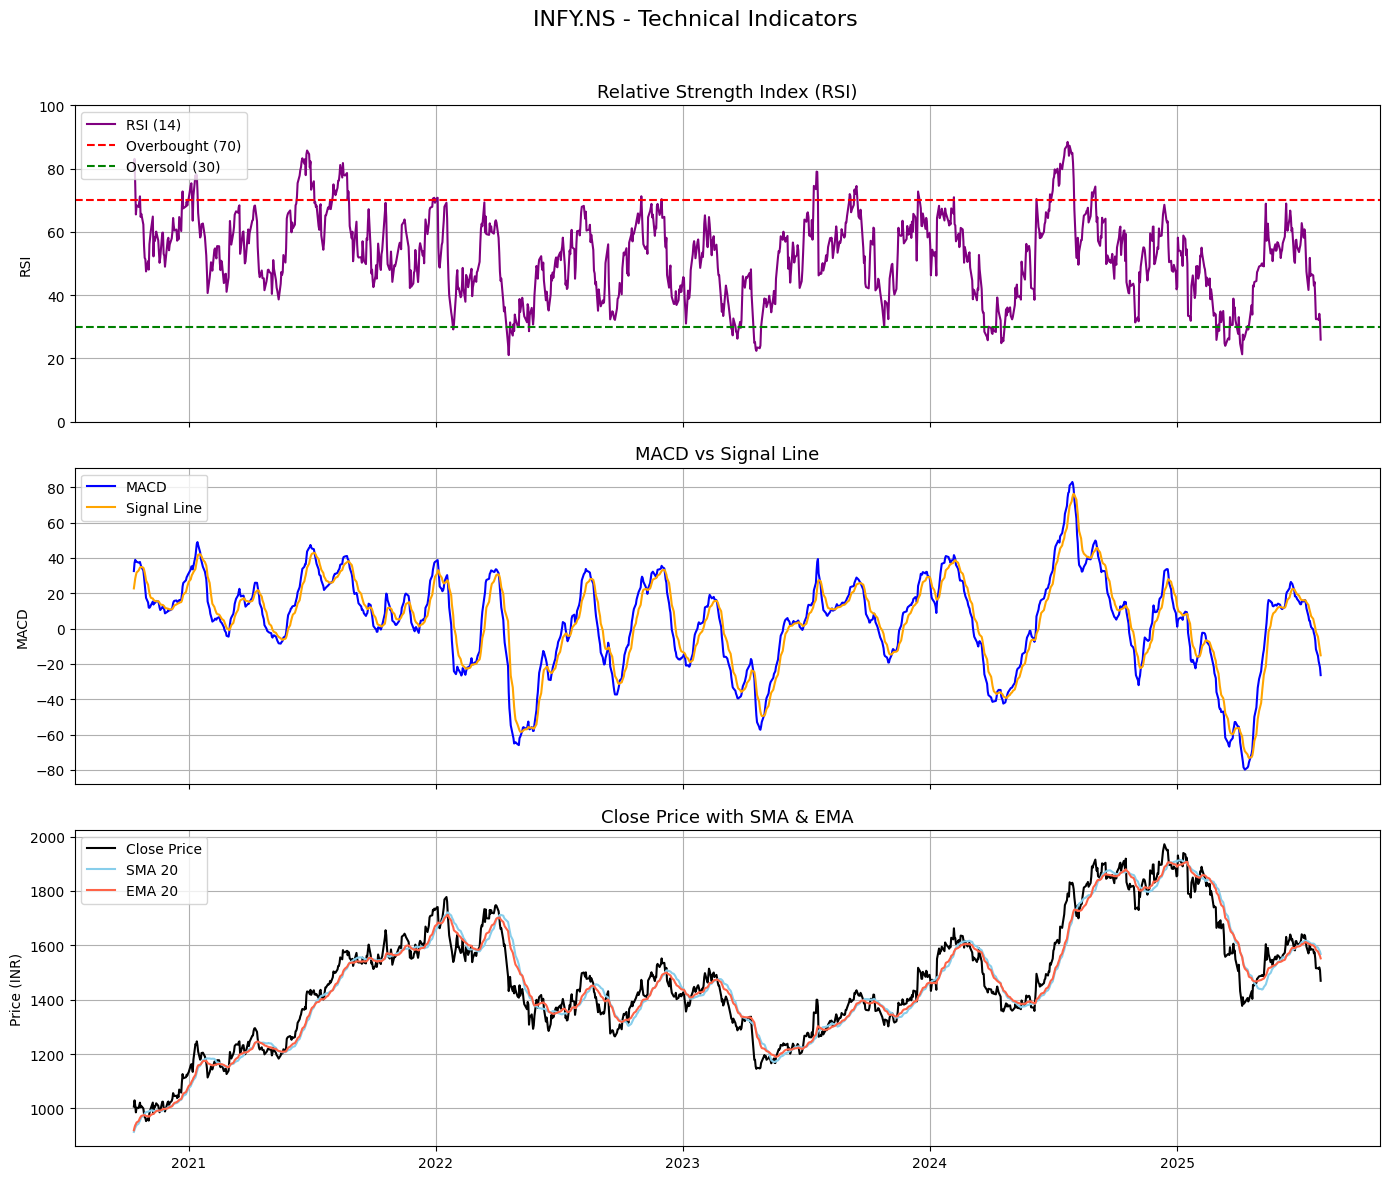

In [189]:
symbol = 'INFY.NS' 
data = processed_infy 

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle(f'{symbol} - Technical Indicators', fontsize=16)

# RSI
axes[0].plot(data.index, data['RSI'], label='RSI (14)', color='purple')
axes[0].axhline(70, color='red', linestyle='--', label='Overbought (70)')
axes[0].axhline(30, color='green', linestyle='--', label='Oversold (30)')
axes[0].set_ylim(0, 100)
axes[0].set_ylabel('RSI')
axes[0].set_title('Relative Strength Index (RSI)', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].grid(True)

# MACD
axes[1].plot(data.index, data['MACD'], label='MACD', color='blue')
axes[1].plot(data.index, data['MACD_Signal'], label='Signal Line', color='orange')
axes[1].set_ylabel('MACD')
axes[1].set_title('MACD vs Signal Line', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Close + SMA + EMA
axes[2].plot(data.index, data['Close'], label='Close Price', color='black')
axes[2].plot(data.index, data['SMA_20'], label='SMA 20', color='skyblue')
axes[2].plot(data.index, data['EMA_20'], label='EMA 20', color='tomato')
axes[2].set_ylabel('Price (INR)')
axes[2].set_title('Close Price with SMA & EMA', fontsize=13)
axes[2].legend(loc='upper left')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

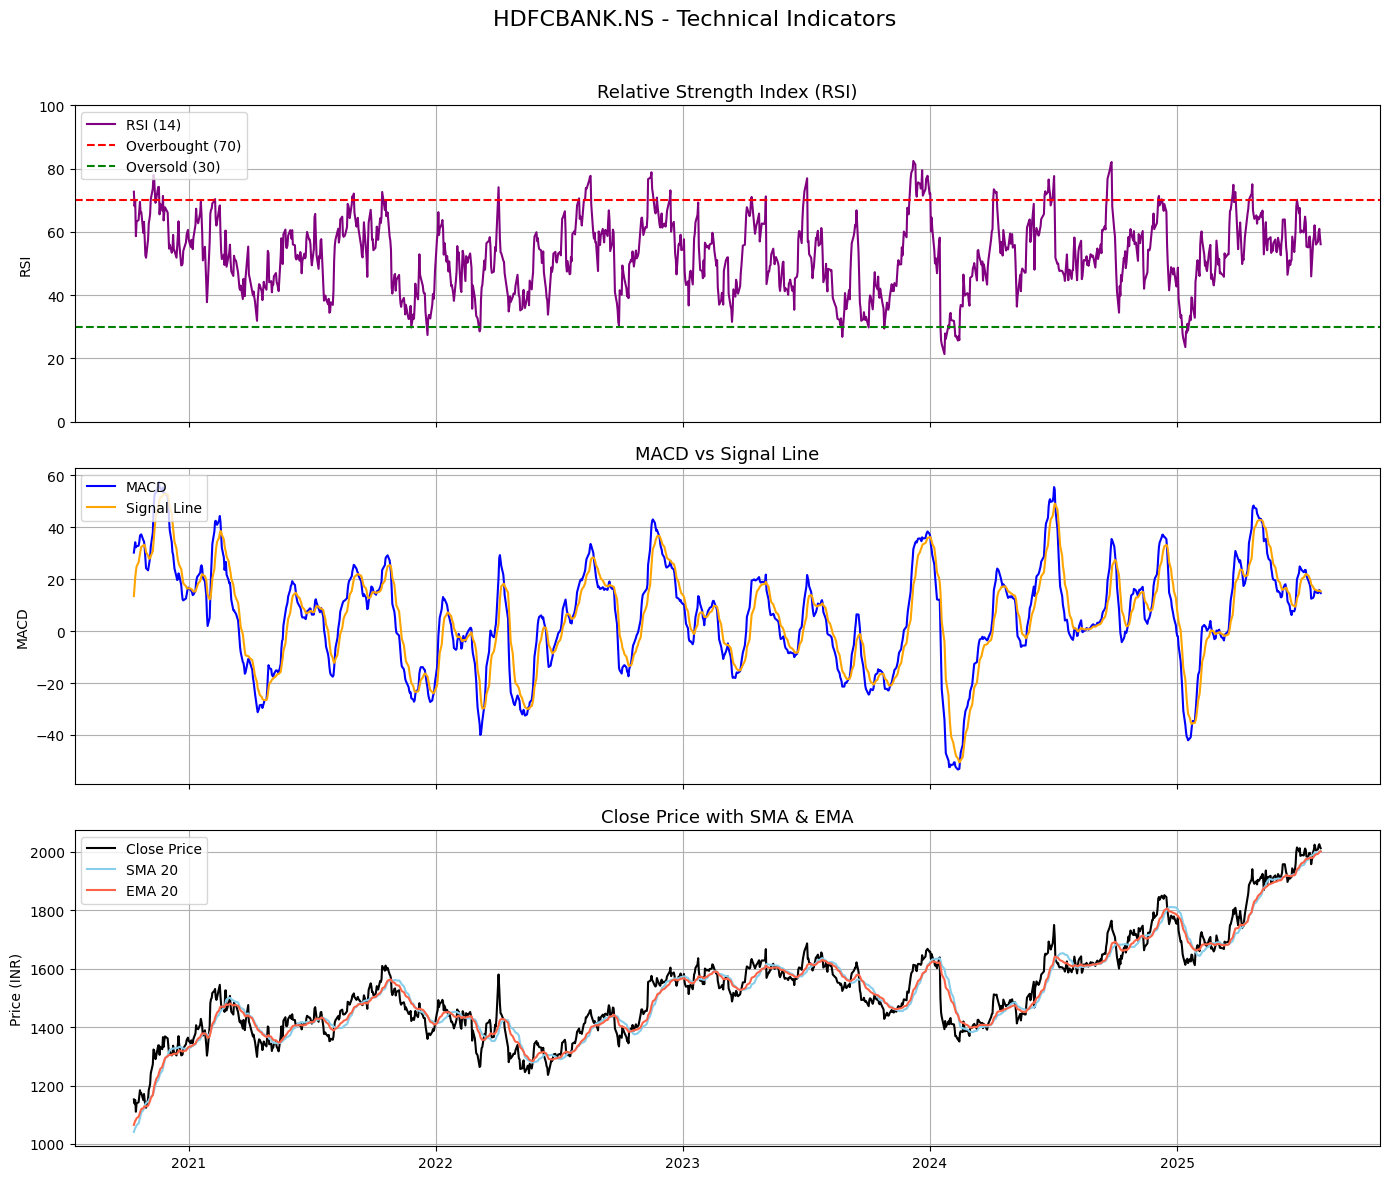

In [190]:
symbol = 'HDFCBANK.NS'
data = processed_hdfc  # Make sure this is defined from preprocessing

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle(f'{symbol} - Technical Indicators', fontsize=16)

# RSI
axes[0].plot(data.index, data['RSI'], label='RSI (14)', color='purple')
axes[0].axhline(70, color='red', linestyle='--', label='Overbought (70)')
axes[0].axhline(30, color='green', linestyle='--', label='Oversold (30)')
axes[0].set_ylim(0, 100)
axes[0].set_ylabel('RSI')
axes[0].set_title('Relative Strength Index (RSI)', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].grid(True)

# MACD
axes[1].plot(data.index, data['MACD'], label='MACD', color='blue')
axes[1].plot(data.index, data['MACD_Signal'], label='Signal Line', color='orange')
axes[1].set_ylabel('MACD')
axes[1].set_title('MACD vs Signal Line', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Close + SMA + EMA
axes[2].plot(data.index, data['Close'], label='Close Price', color='black')
axes[2].plot(data.index, data['SMA_20'], label='SMA 20', color='skyblue')
axes[2].plot(data.index, data['EMA_20'], label='EMA 20', color='tomato')
axes[2].set_ylabel('Price (INR)')
axes[2].set_title('Close Price with SMA & EMA', fontsize=13)
axes[2].legend(loc='upper left')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

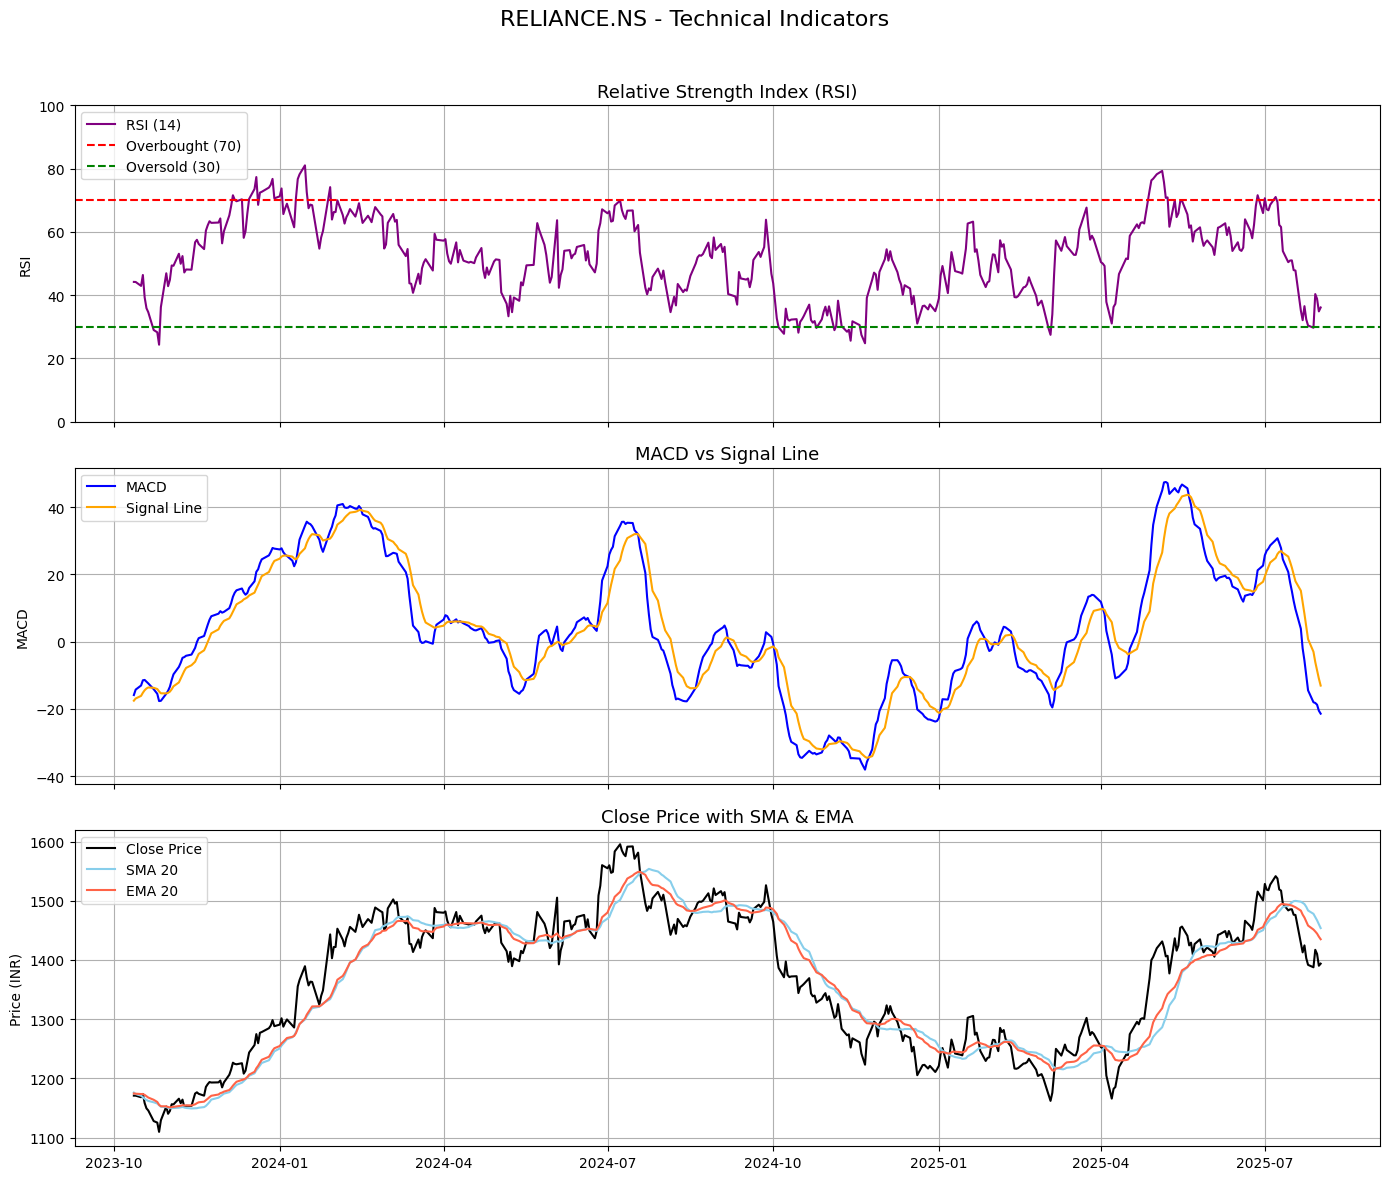

In [191]:
symbol = 'RELIANCE.NS'
data = processed_reliance  # Again, this should be defined already

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle(f'{symbol} - Technical Indicators', fontsize=16)

# RSI
axes[0].plot(data.index, data['RSI'], label='RSI (14)', color='purple')
axes[0].axhline(70, color='red', linestyle='--', label='Overbought (70)')
axes[0].axhline(30, color='green', linestyle='--', label='Oversold (30)')
axes[0].set_ylim(0, 100)
axes[0].set_ylabel('RSI')
axes[0].set_title('Relative Strength Index (RSI)', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].grid(True)

# MACD
axes[1].plot(data.index, data['MACD'], label='MACD', color='blue')
axes[1].plot(data.index, data['MACD_Signal'], label='Signal Line', color='orange')
axes[1].set_ylabel('MACD')
axes[1].set_title('MACD vs Signal Line', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Close + SMA + EMA
axes[2].plot(data.index, data['Close'], label='Close Price', color='black')
axes[2].plot(data.index, data['SMA_20'], label='SMA 20', color='skyblue')
axes[2].plot(data.index, data['EMA_20'], label='EMA 20', color='tomato')
axes[2].set_ylabel('Price (INR)')
axes[2].set_title('Close Price with SMA & EMA', fontsize=13)
axes[2].legend(loc='upper left')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## MODEL TRAINING AND BACKTESTING

### INFY.NS

In [192]:
# Prepare Data ===
symbol = 'INFY.NS'
data = yf.Ticker(symbol).history(period='5y')
processed_infy = preprocess_stock(data)
features = ["RSI", "MACD", "MACD_Signal", "SMA_20", "EMA_20", "Volatility"]
X = processed_infy[features]
y = processed_infy["Target"]

# Hyperparameter Tuning with TimeSeriesSplit ===
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=TimeSeriesSplit(n_splits=5),
    verbose=0,
    n_jobs=-1
)
grid.fit(X, y)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}



✅ Accuracy: 0.895
✅ Precision: 0.902


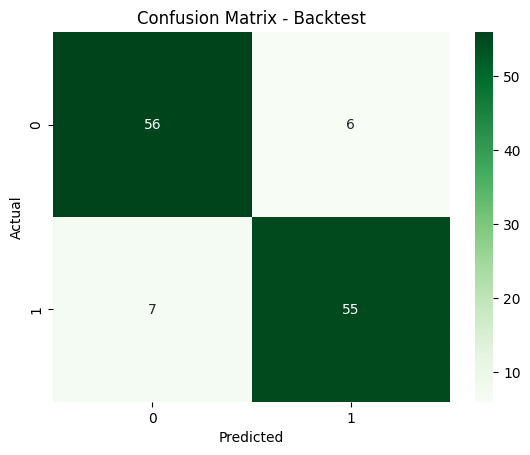

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        62
           1       0.90      0.89      0.89        62

    accuracy                           0.90       124
   macro avg       0.90      0.90      0.90       124
weighted avg       0.90      0.90      0.90       124



In [193]:
# Backtest (Last 6 Months Only) ===
last_6mo = processed_infy.index >= (processed_infy.index.max() - pd.DateOffset(months=6))
X_backtest = X[last_6mo]
y_backtest = y[last_6mo]
y_pred = best_model.predict(X_backtest)

# Classification Report + Confusion Matrix ===
print("\n✅ Accuracy:", round(accuracy_score(y_backtest, y_pred), 3))
print("✅ Precision:", round(precision_score(y_backtest, y_pred), 3))

cm = confusion_matrix(y_backtest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Backtest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_backtest, y_pred))

In [194]:
# Simulate Trading Based on ML Predictions ===
backtest_df = processed_infy.loc[X_backtest.index].copy()
backtest_df["ML_Prediction"] = y_pred
backtest_df["Buy_Price"] = backtest_df["Close"].where(backtest_df["ML_Prediction"] == 1)
backtest_df["Sell_Price"] = backtest_df["Close"].shift(-1).where(backtest_df["ML_Prediction"] == 1)

backtest_df["Trade_Return"] = (backtest_df["Sell_Price"] - backtest_df["Buy_Price"]) / backtest_df["Buy_Price"]
backtest_df = backtest_df.dropna(subset=["Trade_Return"])

# Trade Metrics ===
total_trades = len(backtest_df)
profitable_trades = (backtest_df["Trade_Return"] > 0).sum()
avg_return = backtest_df["Trade_Return"].mean()
hit_ratio = profitable_trades / total_trades
cumulative_return = (1 + backtest_df["Trade_Return"]).prod() - 1

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {profitable_trades}")
print(f"🎯 Hit Ratio: {round(hit_ratio, 2)}")
print(f"💸 Avg Trade Return: {round(avg_return*100, 2)}%")
print(f"📈 Cumulative Return: {round(cumulative_return*100, 2)}%")


📊 Total Trades: 61
✅ Profitable Trades: 55
🎯 Hit Ratio: 0.9
💸 Avg Trade Return: 0.66%
📈 Cumulative Return: 48.8%


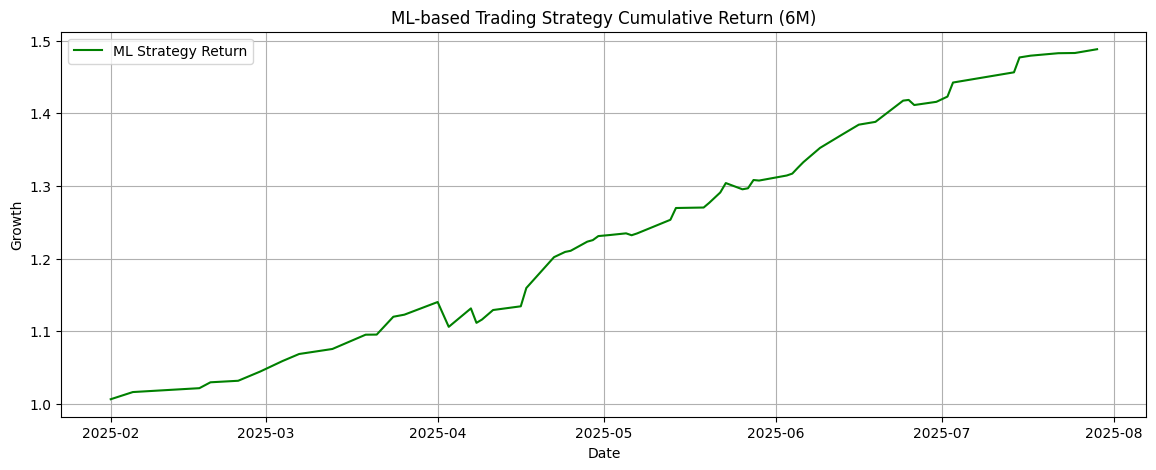

In [195]:
# === Step 7: Visualize Cumulative Return ===
plt.figure(figsize=(14, 5))
plt.plot(backtest_df.index, (1 + backtest_df["Trade_Return"]).cumprod(), label="ML Strategy Return", color='green')
plt.title("ML-based Trading Strategy Cumulative Return (6M)")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.grid(True)
plt.legend()
plt.show()

In [196]:
# === Step 8: Profit vs Loss Summary ===
df_recent = processed_infy[last_6mo].copy()
df_recent["Predicted"] = best_model.predict(df_recent[features])
df_recent["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)

profitable_trades = df_recent[(df_recent["Predicted"] == 1) & (df_recent["Target"] == 1)]
losing_trades = df_recent[(df_recent["Predicted"] == 1) & (df_recent["Target"] == 0)]

total_trades = len(profitable_trades) + len(losing_trades)
win_ratio = len(profitable_trades) / total_trades if total_trades > 0 else 0
avg_profit = profitable_trades["Trade_Return"].mean()
avg_loss = losing_trades["Trade_Return"].mean()

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {len(profitable_trades)}")
print(f"❌ Losing Trades: {len(losing_trades)}")
print(f"🎯 Win Ratio: {round(win_ratio, 2)}")
print(f"📈 Avg Profit: {round(avg_profit * 100, 2)}%")
print(f"📉 Avg Loss: {round(avg_loss * 100, 2)}%")


📊 Total Trades: 61
✅ Profitable Trades: 55
❌ Losing Trades: 6
🎯 Win Ratio: 0.9
📈 Avg Profit: 0.84%
📉 Avg Loss: -1.03%


### RELIANCE.NS

In [197]:
# Prepare Data ===
symbol = 'RELIANCE.NS'
data = yf.Ticker(symbol).history(period='5y')
processed_reliance = preprocess_stock(data)
features = ["RSI", "MACD", "MACD_Signal", "SMA_20", "EMA_20", "Volatility"]
X = processed_reliance[features]
y = processed_reliance["Target"]

# Hyperparameter Tuning with TimeSeriesSplit ===
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=TimeSeriesSplit(n_splits=5),
    verbose=0,
    n_jobs=-1
)
grid.fit(X, y)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}



✅ Accuracy: 0.734
✅ Precision: 0.721


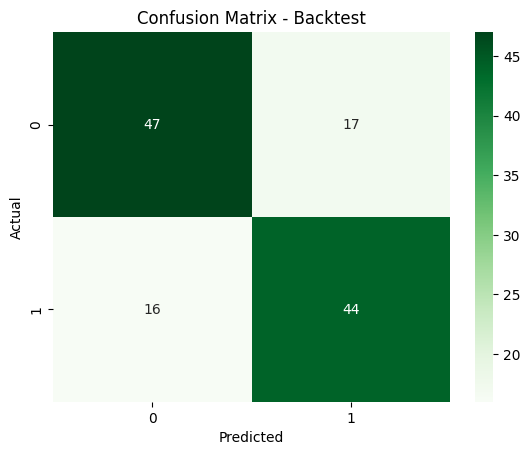

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        64
           1       0.72      0.73      0.73        60

    accuracy                           0.73       124
   macro avg       0.73      0.73      0.73       124
weighted avg       0.73      0.73      0.73       124



In [198]:
# Backtest (Last 6 Months Only) ===
last_6mo = processed_infy.index >= (processed_infy.index.max() - pd.DateOffset(months=6))
X_backtest = X[last_6mo]
y_backtest = y[last_6mo]
y_pred = best_model.predict(X_backtest)

# Classification Report + Confusion Matrix ===
print("\n✅ Accuracy:", round(accuracy_score(y_backtest, y_pred), 3))
print("✅ Precision:", round(precision_score(y_backtest, y_pred), 3))

cm = confusion_matrix(y_backtest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Backtest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_backtest, y_pred))

In [199]:
# Simulate Trading Based on ML Predictions ===
backtest_df = processed_infy.loc[X_backtest.index].copy()
backtest_df["ML_Prediction"] = y_pred
backtest_df["Buy_Price"] = backtest_df["Close"].where(backtest_df["ML_Prediction"] == 1)
backtest_df["Sell_Price"] = backtest_df["Close"].shift(-1).where(backtest_df["ML_Prediction"] == 1)

backtest_df["Trade_Return"] = (backtest_df["Sell_Price"] - backtest_df["Buy_Price"]) / backtest_df["Buy_Price"]
backtest_df = backtest_df.dropna(subset=["Trade_Return"])

# Trade Metrics ===
total_trades = len(backtest_df)
profitable_trades = (backtest_df["Trade_Return"] > 0).sum()
avg_return = backtest_df["Trade_Return"].mean()
hit_ratio = profitable_trades / total_trades
cumulative_return = (1 + backtest_df["Trade_Return"]).prod() - 1

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {profitable_trades}")
print(f"🎯 Hit Ratio: {round(hit_ratio, 2)}")
print(f"💸 Avg Trade Return: {round(avg_return*100, 2)}%")
print(f"📈 Cumulative Return: {round(cumulative_return*100, 2)}%")


📊 Total Trades: 61
✅ Profitable Trades: 36
🎯 Hit Ratio: 0.59
💸 Avg Trade Return: 0.04%
📈 Cumulative Return: 1.15%


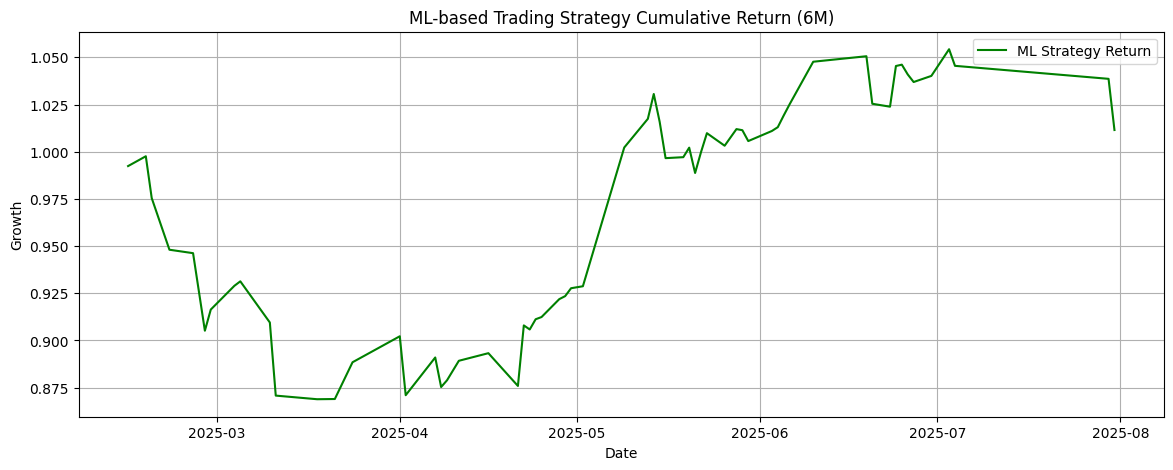

In [200]:
# === Step 7: Visualize Cumulative Return ===
plt.figure(figsize=(14, 5))
plt.plot(backtest_df.index, (1 + backtest_df["Trade_Return"]).cumprod(), label="ML Strategy Return", color='green')
plt.title("ML-based Trading Strategy Cumulative Return (6M)")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.grid(True)
plt.legend()
plt.show()

In [201]:
# === Step 8: Profit vs Loss Summary ===
df_recent = processed_infy[last_6mo].copy()
df_recent["Predicted"] = best_model.predict(df_recent[features])
df_recent["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)

profitable_trades = df_recent[(df_recent["Predicted"] == 1) & (df_recent["Target"] == 1)]
losing_trades = df_recent[(df_recent["Predicted"] == 1) & (df_recent["Target"] == 0)]

total_trades = len(profitable_trades) + len(losing_trades)
win_ratio = len(profitable_trades) / total_trades if total_trades > 0 else 0
avg_profit = profitable_trades["Trade_Return"].mean()
avg_loss = losing_trades["Trade_Return"].mean()

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {len(profitable_trades)}")
print(f"❌ Losing Trades: {len(losing_trades)}")
print(f"🎯 Win Ratio: {round(win_ratio, 2)}")
print(f"📈 Avg Profit: {round(avg_profit * 100, 2)}%")
print(f"📉 Avg Loss: {round(avg_loss * 100, 2)}%")


📊 Total Trades: 59
✅ Profitable Trades: 32
❌ Losing Trades: 27
🎯 Win Ratio: 0.54
📈 Avg Profit: 1.08%
📉 Avg Loss: -1.74%


### HDFCBANK.NS

In [202]:
# === Step 1: Prepare Data ===
symbol = 'HDFCBANK.NS'
data = yf.Ticker(symbol).history(period='5y')
processed_hdfcbank = preprocess_stock(data)
features = ["RSI", "MACD", "MACD_Signal", "SMA_20", "EMA_20", "Volatility"]
X = processed_hdfcbank[features]
y = processed_hdfcbank["Target"]

# === Step 2: Hyperparameter Tuning with TimeSeriesSplit ===
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=TimeSeriesSplit(n_splits=5),
    verbose=0,
    n_jobs=-1
)
grid.fit(X, y)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:38:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}



✅ Accuracy: 0.944
✅ Precision: 0.919


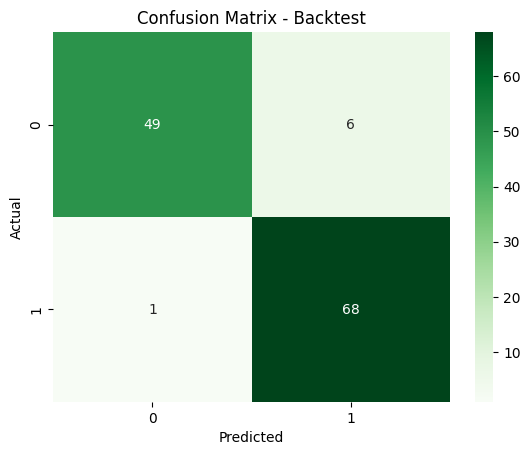

In [203]:
# === Step 3: Backtest (Last 6 Months Only) ===
last_6mo = processed_infy.index >= (processed_infy.index.max() - pd.DateOffset(months=6))
X_backtest = X[last_6mo]
y_backtest = y[last_6mo]
y_pred = best_model.predict(X_backtest)

# === Step 4: Classification Report + Confusion Matrix ===
print("\n✅ Accuracy:", round(accuracy_score(y_backtest, y_pred), 3))
print("✅ Precision:", round(precision_score(y_backtest, y_pred), 3))

cm = confusion_matrix(y_backtest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Backtest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [204]:
# === Step 5: Simulate Trading Based on ML Predictions ===
backtest_df = processed_infy.loc[X_backtest.index].copy()
backtest_df["ML_Prediction"] = y_pred
backtest_df["Buy_Price"] = backtest_df["Close"].where(backtest_df["ML_Prediction"] == 1)
backtest_df["Sell_Price"] = backtest_df["Close"].shift(-1).where(backtest_df["ML_Prediction"] == 1)

backtest_df["Trade_Return"] = (backtest_df["Sell_Price"] - backtest_df["Buy_Price"]) / backtest_df["Buy_Price"]
backtest_df = backtest_df.dropna(subset=["Trade_Return"])

# === Step 6: Trade Metrics ===
total_trades = len(backtest_df)
profitable_trades = (backtest_df["Trade_Return"] > 0).sum()
avg_return = backtest_df["Trade_Return"].mean()
hit_ratio = profitable_trades / total_trades
cumulative_return = (1 + backtest_df["Trade_Return"]).prod() - 1

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {profitable_trades}")
print(f"🎯 Hit Ratio: {round(hit_ratio, 2)}")
print(f"💸 Avg Trade Return: {round(avg_return*100, 2)}%")
print(f"📈 Cumulative Return: {round(cumulative_return*100, 2)}%")


📊 Total Trades: 74
✅ Profitable Trades: 42
🎯 Hit Ratio: 0.57
💸 Avg Trade Return: 0.03%
📈 Cumulative Return: 1.44%


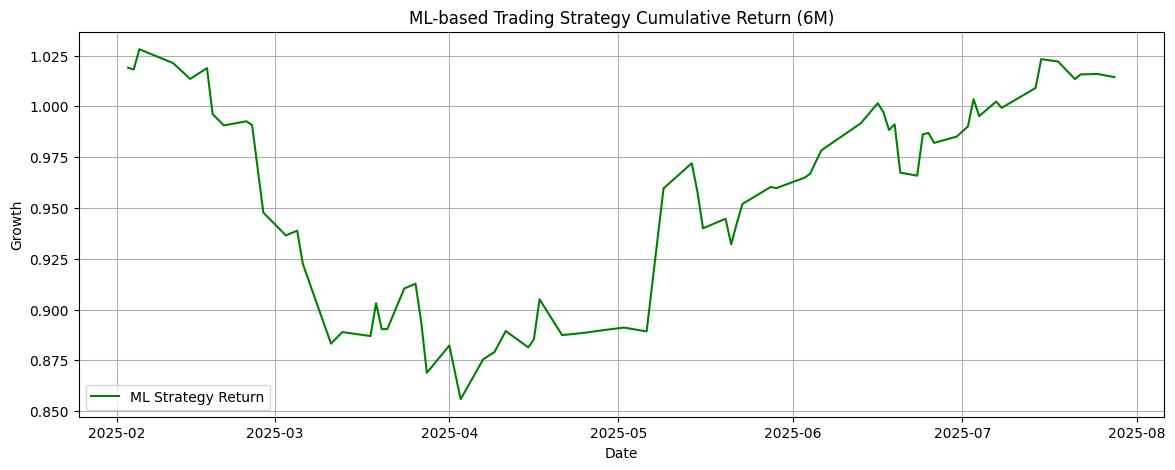

In [205]:
# === Step 7: Visualize Cumulative Return ===
plt.figure(figsize=(14, 5))
plt.plot(backtest_df.index, (1 + backtest_df["Trade_Return"]).cumprod(), label="ML Strategy Return", color='green')
plt.title("ML-based Trading Strategy Cumulative Return (6M)")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.grid(True)
plt.legend()
plt.show()

In [206]:
# === Step 8: Profit vs Loss Summary ===
df_recent = processed_infy[last_6mo].copy()
df_recent["Predicted"] = best_model.predict(df_recent[features])
df_recent["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)

profitable_trades = df_recent[(df_recent["Predicted"] == 1) & (df_recent["Target"] == 1)]
losing_trades = df_recent[(df_recent["Predicted"] == 1) & (df_recent["Target"] == 0)]

total_trades = len(profitable_trades) + len(losing_trades)
win_ratio = len(profitable_trades) / total_trades if total_trades > 0 else 0
avg_profit = profitable_trades["Trade_Return"].mean()
avg_loss = losing_trades["Trade_Return"].mean()

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {len(profitable_trades)}")
print(f"❌ Losing Trades: {len(losing_trades)}")
print(f"🎯 Win Ratio: {round(win_ratio, 2)}")
print(f"📈 Avg Profit: {round(avg_profit * 100, 2)}%")
print(f"📉 Avg Loss: {round(avg_loss * 100, 2)}%")



📊 Total Trades: 58
✅ Profitable Trades: 30
❌ Losing Trades: 28
🎯 Win Ratio: 0.52
📈 Avg Profit: 1.16%
📉 Avg Loss: -0.88%


## 🤖 Machine Learning Results Summary

### 🔹 INFY.NS (Tech)
- Accuracy: 89.5%
- Precision: 90.2%
- Hit Ratio: 90%
- Cumulative Return: ✅ 48.8%
- Avg Profit: 0.84% | Avg Loss: -1.03%

### 🔹 RELIANCE.NS (Energy)
- Accuracy: 73.4%
- Precision: 72.1%
- Hit Ratio: 59%
- Cumulative Return: ⚠️ 1.15%
- Avg Profit: 1.08% | Avg Loss: -1.74%

### 🔹 HDFCBANK.NS (Finance)
- Accuracy: 94.4%
- Precision: 91.9%
- Hit Ratio: 57%
- Cumulative Return: ⚠️ 1.44%
- Avg Profit: 1.16% | Avg Loss: -0.88%

# Using Strategy ( Implement RSI < 30 as a buy signal and cnnfirm with 20-DMA crossing above 50-DMA)

## INFY.NS


📊 Strategy Performance (RSI + SMA)
🔍 Strategy triggered: 3 times in last 6 months
✅ Signal Accuracy: 0.67

💰 Strategy Metrics:
📊 Total Trades: 2
✅ Profitable Trades: 1
❌ Losing Trades: 1
🎯 Win Ratio: 0.5
📈 Avg Profit: 0.02%
📉 Avg Loss: -0.15%
💸 Cumulative Return: -0.13%


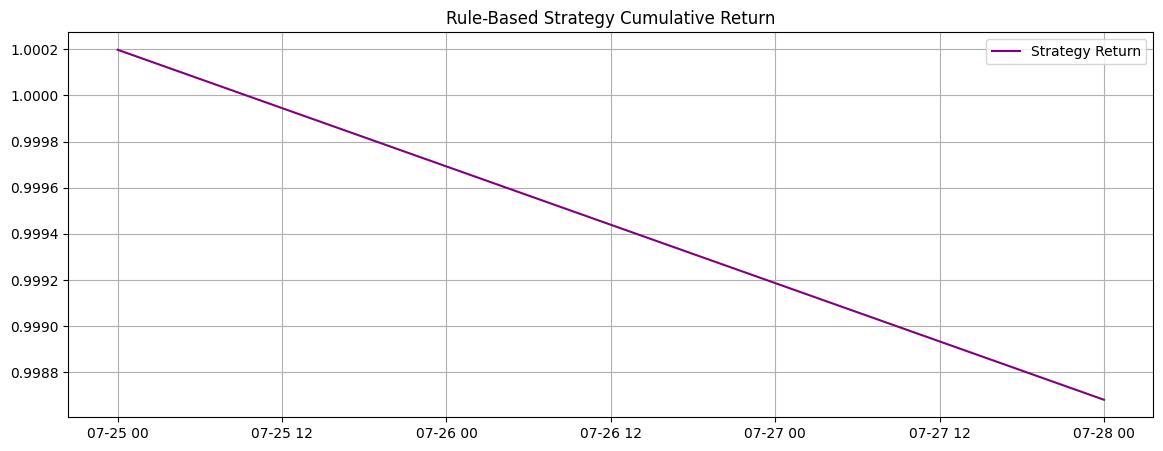

In [207]:
# 🧠 Section 3: Strategy Logic (RSI + SMA)

import yfinance as yf
import pandas as pd
import ta  # for technical indicators
import matplotlib.pyplot as plt

# --- Load Data ---
symbol = "INFY.NS"
df = yf.Ticker(symbol).history(period="5y")

# --- Indicators ---
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# --- Buy Signal ---
df['Buy_Signal'] = ((df['RSI'] < 35) & (df['SMA_20'] > df['SMA_50'])).astype(int)

# --- Target (same day or next day move) ---
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# --- Filter last 6 months ---
df_recent = df[df.index >= (df.index.max() - pd.DateOffset(months=6))]

# --- Evaluate Signal Accuracy ---
strategy_signals = df_recent[df_recent['Buy_Signal'] == 1]
correct_signals = (strategy_signals['Target'] == 1).sum()
strategy_accuracy = correct_signals / len(strategy_signals) if len(strategy_signals) > 0 else 0

# --- Print Accuracy ---
print("\n📊 Strategy Performance (RSI + SMA)")
print(f"🔍 Strategy triggered: {len(strategy_signals)} times in last 6 months")
print(f"✅ Signal Accuracy: {round(strategy_accuracy, 2)}")

# 💰 Section 4: Comparison & Metrics

# Simulate trade return
strategy_signals['Buy_Price'] = strategy_signals['Close']
strategy_signals['Sell_Price'] = strategy_signals['Close'].shift(-1)
strategy_signals['Trade_Return'] = (strategy_signals['Sell_Price'] - strategy_signals['Buy_Price']) / strategy_signals['Buy_Price']

# Drop NaNs
strategy_signals.dropna(inplace=True)

# Calculate metrics
total_trades = len(strategy_signals)
profitable_trades = (strategy_signals['Trade_Return'] > 0).sum()
losing_trades = (strategy_signals['Trade_Return'] <= 0).sum()
win_ratio = profitable_trades / total_trades if total_trades > 0 else 0
avg_profit = strategy_signals[strategy_signals['Trade_Return'] > 0]['Trade_Return'].mean()
avg_loss = strategy_signals[strategy_signals['Trade_Return'] <= 0]['Trade_Return'].mean()
cumulative_return = (1 + strategy_signals['Trade_Return']).prod() - 1


# Filter last 6 months
df_recent = processed_infy[processed_infy.index >= (processed_infy.index.max() - pd.DateOffset(months=6))].copy()

# Strategy condition: RSI < 35 and SMA20 crosses above SMA50
df_recent["Buy_Signal"] = (
    (df_recent["RSI"] < 35) &
    (df_recent["SMA_20"] > df_recent["SMA_50"]) &
    (df_recent["SMA_20"].shift(1) <= df_recent["SMA_50"].shift(1))
).astype(int)

# Simulate next-day return
df_recent["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)

# Create filtered DataFrame for buy signals only
df_strategy_backtest = df_recent[df_recent["Buy_Signal"] == 1].copy()
df_strategy_backtest = df_strategy_backtest.dropna(subset=["Trade_Return"])

# --- Print Metrics ---
print("\n💰 Strategy Metrics:")
print(f"📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {profitable_trades}")
print(f"❌ Losing Trades: {losing_trades}")
print(f"🎯 Win Ratio: {round(win_ratio, 2)}")
print(f"📈 Avg Profit: {round(avg_profit * 100, 2)}%")
print(f"📉 Avg Loss: {round(avg_loss * 100, 2)}%")
print(f"💸 Cumulative Return: {round(cumulative_return * 100, 2)}%")

# Optional: Plot
plt.figure(figsize=(14, 5))
plt.plot((1 + strategy_signals['Trade_Return']).cumprod(), label="Strategy Return", color='purple')
plt.title("Rule-Based Strategy Cumulative Return")
plt.grid(True)
plt.legend()
plt.show()

## HDFCBANK.NS


📊 Strategy Performance (RSI + SMA)
🔍 Strategy triggered: 4 times in last 6 months
✅ Signal Accuracy: 0.5

💰 Strategy Metrics:
📊 Total Trades: 3
✅ Profitable Trades: 1
❌ Losing Trades: 2
🎯 Win Ratio: 0.33
📈 Avg Profit: 0.02%
📉 Avg Loss: -1.26%
💸 Cumulative Return: -2.5%


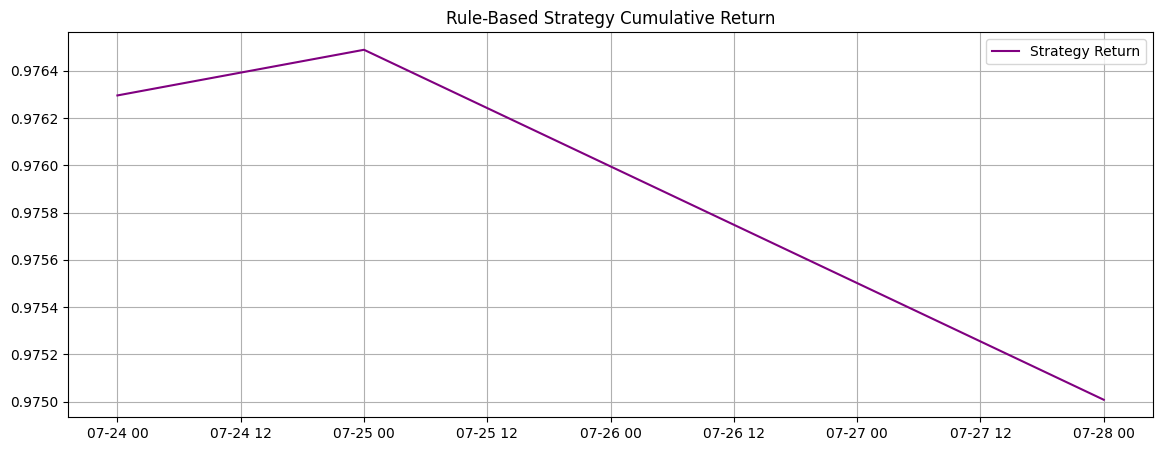

In [211]:
# 🧠 Section 3: Strategy Logic (RSI + SMA)

import yfinance as yf
import pandas as pd
import ta  # for technical indicators
import matplotlib.pyplot as plt

# --- Load Data ---
symbol = "INFY.NS"
df = yf.Ticker(symbol).history(period="5y")

# --- Indicators ---
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# --- Buy Signal ---
df['Buy_Signal'] = ((df['RSI'] < 40) & (df['SMA_20'] > df['SMA_50'])).astype(int)

# --- Target (same day or next day move) ---
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# --- Filter last 6 months ---
df_recent = df[df.index >= (df.index.max() - pd.DateOffset(months=6))]

# --- Evaluate Signal Accuracy ---
strategy_signals = df_recent[df_recent['Buy_Signal'] == 1]
correct_signals = (strategy_signals['Target'] == 1).sum()
strategy_accuracy = correct_signals / len(strategy_signals) if len(strategy_signals) > 0 else 0

# --- Print Accuracy ---
print("\n📊 Strategy Performance (RSI + SMA)")
print(f"🔍 Strategy triggered: {len(strategy_signals)} times in last 6 months")
print(f"✅ Signal Accuracy: {round(strategy_accuracy, 2)}")

# 💰 Section 4: Comparison & Metrics

# Simulate trade return
strategy_signals['Buy_Price'] = strategy_signals['Close']
strategy_signals['Sell_Price'] = strategy_signals['Close'].shift(-1)
strategy_signals['Trade_Return'] = (strategy_signals['Sell_Price'] - strategy_signals['Buy_Price']) / strategy_signals['Buy_Price']

# Drop NaNs
strategy_signals.dropna(inplace=True)

# Calculate metrics
total_trades = len(strategy_signals)
profitable_trades = (strategy_signals['Trade_Return'] > 0).sum()
losing_trades = (strategy_signals['Trade_Return'] <= 0).sum()
win_ratio = profitable_trades / total_trades if total_trades > 0 else 0
avg_profit = strategy_signals[strategy_signals['Trade_Return'] > 0]['Trade_Return'].mean()
avg_loss = strategy_signals[strategy_signals['Trade_Return'] <= 0]['Trade_Return'].mean()
cumulative_return = (1 + strategy_signals['Trade_Return']).prod() - 1


# Filter last 6 months
df_recent = processed_infy[processed_infy.index >= (processed_infy.index.max() - pd.DateOffset(months=6))].copy()

# Strategy condition: RSI < 35 and SMA20 crosses above SMA50
df_recent["Buy_Signal"] = (
    (df_recent["RSI"] < 40) &
    (df_recent["SMA_20"] > df_recent["SMA_50"]) &
    (df_recent["SMA_20"].shift(1) <= df_recent["SMA_50"].shift(1))
).astype(int)

# Simulate next-day return
df_recent["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)

# Create filtered DataFrame for buy signals only
df_strategy_backtest = df_recent[df_recent["Buy_Signal"] == 1].copy()
df_strategy_backtest = df_strategy_backtest.dropna(subset=["Trade_Return"])

# --- Print Metrics ---
print("\n💰 Strategy Metrics:")
print(f"📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {profitable_trades}")
print(f"❌ Losing Trades: {losing_trades}")
print(f"🎯 Win Ratio: {round(win_ratio, 2)}")
print(f"📈 Avg Profit: {round(avg_profit * 100, 2)}%")
print(f"📉 Avg Loss: {round(avg_loss * 100, 2)}%")
print(f"💸 Cumulative Return: {round(cumulative_return * 100, 2)}%")

# Optional: Plot
plt.figure(figsize=(14, 5))
plt.plot((1 + strategy_signals['Trade_Return']).cumprod(), label="Strategy Return", color='purple')
plt.title("Rule-Based Strategy Cumulative Return")
plt.grid(True)
plt.legend()
plt.show()

## RELIANCE.NS


📊 Strategy Performance (RSI + SMA)
🔍 Strategy triggered: 6 times in last 6 months
✅ Signal Accuracy: 0.67

💰 Strategy Metrics:
📊 Total Trades: 5
✅ Profitable Trades: 2
❌ Losing Trades: 3
🎯 Win Ratio: 0.4
📈 Avg Profit: 10.69%
📉 Avg Loss: -0.6%
💸 Cumulative Return: 19.26%


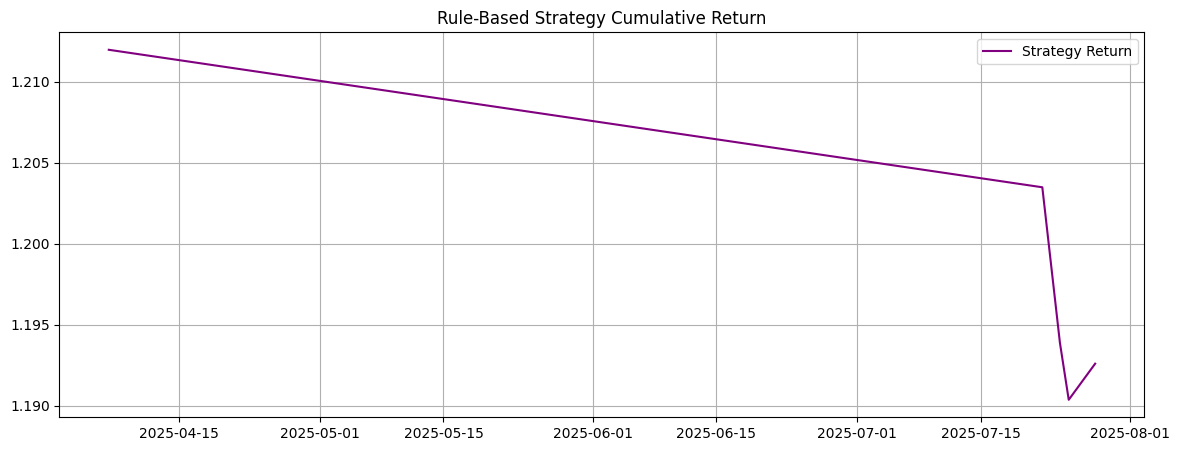

In [215]:
# 🧠 Section 3: Strategy Logic (RSI + SMA)

import yfinance as yf
import pandas as pd
import ta  # for technical indicators
import matplotlib.pyplot as plt

# --- Load Data ---
symbol = "RELIANCE.NS"
df = yf.Ticker(symbol).history(period="5y")

# --- Indicators ---
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# --- Buy Signal ---
df['Buy_Signal'] = ((df['RSI'] < 35) & (df['SMA_20'] > df['SMA_50'])).astype(int)

# --- Target (same day or next day move) ---
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# --- Filter last 6 months ---
df_recent = df[df.index >= (df.index.max() - pd.DateOffset(months=6))]

# --- Evaluate Signal Accuracy ---
strategy_signals = df_recent[df_recent['Buy_Signal'] == 1]
correct_signals = (strategy_signals['Target'] == 1).sum()
strategy_accuracy = correct_signals / len(strategy_signals) if len(strategy_signals) > 0 else 0

# --- Print Accuracy ---
print("\n📊 Strategy Performance (RSI + SMA)")
print(f"🔍 Strategy triggered: {len(strategy_signals)} times in last 6 months")
print(f"✅ Signal Accuracy: {round(strategy_accuracy, 2)}")

# 💰 Section 4: Comparison & Metrics

# Simulate trade return
strategy_signals['Buy_Price'] = strategy_signals['Close']
strategy_signals['Sell_Price'] = strategy_signals['Close'].shift(-1)
strategy_signals['Trade_Return'] = (strategy_signals['Sell_Price'] - strategy_signals['Buy_Price']) / strategy_signals['Buy_Price']

# Drop NaNs
strategy_signals.dropna(inplace=True)

# Calculate metrics
total_trades = len(strategy_signals)
profitable_trades = (strategy_signals['Trade_Return'] > 0).sum()
losing_trades = (strategy_signals['Trade_Return'] <= 0).sum()
win_ratio = profitable_trades / total_trades if total_trades > 0 else 0
avg_profit = strategy_signals[strategy_signals['Trade_Return'] > 0]['Trade_Return'].mean()
avg_loss = strategy_signals[strategy_signals['Trade_Return'] <= 0]['Trade_Return'].mean()
cumulative_return = (1 + strategy_signals['Trade_Return']).prod() - 1


# Filter last 6 months
df_recent = processed_infy[processed_infy.index >= (processed_infy.index.max() - pd.DateOffset(months=6))].copy()

# Strategy condition: RSI < 30 and SMA20 crosses above SMA50
df_recent["Buy_Signal"] = (
    (df_recent["RSI"] < 35) &
    (df_recent["SMA_20"] > df_recent["SMA_50"]) &
    (df_recent["SMA_20"].shift(1) <= df_recent["SMA_50"].shift(1))
).astype(int)

# Simulate next-day return
df_recent["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)

# Create filtered DataFrame for buy signals only
df_strategy_backtest = df_recent[df_recent["Buy_Signal"] == 1].copy()
df_strategy_backtest = df_strategy_backtest.dropna(subset=["Trade_Return"])

# --- Print Metrics ---
print("\n💰 Strategy Metrics:")
print(f"📊 Total Trades: {total_trades}")
print(f"✅ Profitable Trades: {profitable_trades}")
print(f"❌ Losing Trades: {losing_trades}")
print(f"🎯 Win Ratio: {round(win_ratio, 2)}")
print(f"📈 Avg Profit: {round(avg_profit * 100, 2)}%")
print(f"📉 Avg Loss: {round(avg_loss * 100, 2)}%")
print(f"💸 Cumulative Return: {round(cumulative_return * 100, 2)}%")

# Optional: Plot
plt.figure(figsize=(14, 5))
plt.plot((1 + strategy_signals['Trade_Return']).cumprod(), label="Strategy Return", color='purple')
plt.title("Rule-Based Strategy Cumulative Return")
plt.grid(True)
plt.legend()
plt.show()

## RESULT AND COMPARISON

In [227]:
from datetime import timedelta

# Step 1: Last 6 months
last_6mo_mask = processed_reliance.index >= (processed_reliance.index.max() - pd.DateOffset(months=6))
df_recent = processed_reliance[last_6mo_mask].copy()

In [228]:
def get_strategy_metrics(df, pred_col):
    trades = df[df[pred_col] == 1].copy()
    trades["Trade_Return"] = df["Close"].pct_change().shift(-1)
    trades.dropna(subset=["Trade_Return"], inplace=True)

    total = len(trades)
    wins = (trades["Trade_Return"] > 0).sum()
    losses = total - wins
    win_ratio = wins / total if total > 0 else 0
    avg_profit = trades[trades["Trade_Return"] > 0]["Trade_Return"].mean()
    avg_loss = trades[trades["Trade_Return"] <= 0]["Trade_Return"].mean()
    cumulative = (1 + trades["Trade_Return"]).prod() - 1

    return {
        "Trades": total,
        "Win Ratio": round(win_ratio, 2),
        "Avg Profit": round(avg_profit * 100, 2) if not np.isnan(avg_profit) else 0,
        "Avg Loss": round(avg_loss * 100, 2) if not np.isnan(avg_loss) else 0,
        "Cumulative Return": round(cumulative * 100, 2)
    }

ml_stats = get_strategy_metrics(df_recent, "ML_Prediction")
logic_stats = get_strategy_metrics(df_recent, "Logic_Signal")

print("\n📊 RELIANCE (Last 6 Months) - ML vs Logic Comparison")
print("Machine Learning Strategy:")
for k, v in ml_stats.items():
    print(f"  {k}: {v}")

print("\nLogic Strategy:")
for k, v in logic_stats.items():
    print(f"  {k}: {v}")


📊 RELIANCE (Last 6 Months) - ML vs Logic Comparison
Machine Learning Strategy:
  Trades: 90
  Win Ratio: 0.49
  Avg Profit: 1.28
  Avg Loss: -0.96
  Cumulative Return: 11.49

Logic Strategy:
  Trades: 123
  Win Ratio: 0.49
  Avg Profit: 1.15
  Avg Loss: -0.92
  Cumulative Return: 10.21


In [229]:
both_agree = df_recent[
    (df_recent["ML_Prediction"] == 1) & (df_recent["Logic_Signal"] == 1)
].copy()

both_agree["Trade_Return"] = df_recent["Close"].pct_change().shift(-1)
both_agree.dropna(subset=["Trade_Return"], inplace=True)

agree_win_rate = (both_agree["Trade_Return"] > 0).mean()
agree_avg_return = both_agree["Trade_Return"].mean()

print(f"\n📅 RELIANCE (Last 6 Months) - Days Both Agreed: {len(both_agree)}")
print(f"✅ Win Rate: {round(agree_win_rate * 100, 2)}%")
print(f"💰 Avg Return: {round(agree_avg_return * 100, 2)}%")


📅 RELIANCE (Last 6 Months) - Days Both Agreed: 123
✅ Win Rate: 48.78%
💰 Avg Return: 0.09%


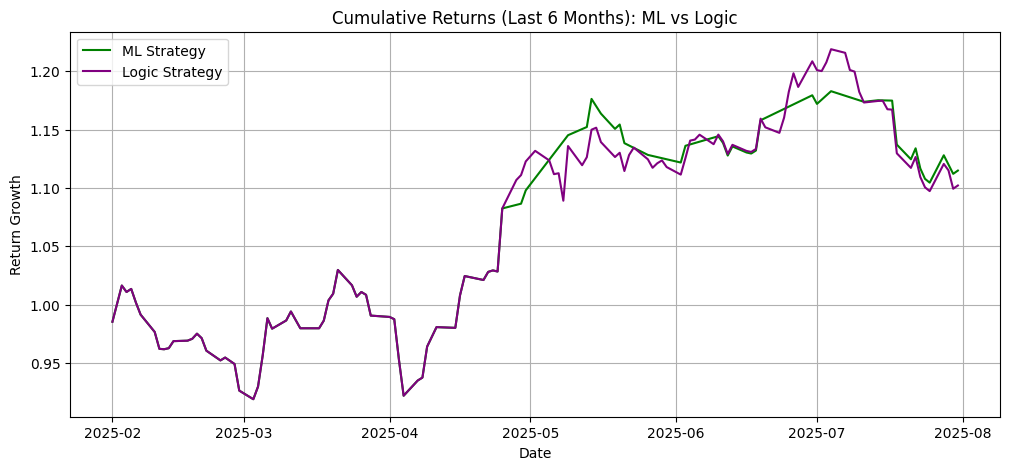

In [230]:
import matplotlib.pyplot as plt

# ML strategy
ml_trades = df_recent[df_recent["ML_Prediction"] == 1].copy()
ml_trades["Return"] = df_recent["Close"].pct_change().shift(-1)
ml_trades["Cumulative"] = (1 + ml_trades["Return"]).cumprod()

# Logic strategy
logic_trades = df_recent[df_recent["Logic_Signal"] == 1].copy()
logic_trades["Return"] = df_recent["Close"].pct_change().shift(-1)
logic_trades["Cumulative"] = (1 + logic_trades["Return"]).cumprod()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(ml_trades.index, ml_trades["Cumulative"], label="ML Strategy", color="green")
plt.plot(logic_trades.index, logic_trades["Cumulative"], label="Logic Strategy", color="purple")
plt.title("Cumulative Returns (Last 6 Months): ML vs Logic")
plt.xlabel("Date")
plt.ylabel("Return Growth")
plt.grid(True)
plt.legend()
plt.show()

In [232]:
# Make sure this runs after ML predictions and logic signals are already added to `df_recent`

# Step 1: Find agreement days
df_agreed = df_recent[(df_recent["ML_Prediction"] == 1) & (df_recent["Buy_Signal"] == 1)].copy()

# Step 2: Drop rows with missing next-day return
df_agreed = df_agreed.dropna(subset=["Trade_Return"])

# Step 3: Add performance columns
df_agreed["Profitable"] = df_agreed["Trade_Return"] > 0

# Step 4: Display key metrics
print("\n📅 RELIANCE - Agreement Trade Details (Last 6 Months)")
print(f"Total Agreement Trades: {len(df_agreed)}")
print(f"✅ Profitable Trades: {df_agreed['Profitable'].sum()}")
print(f"❌ Losing Trades: {(~df_agreed['Profitable']).sum()}")
print(f"🎯 Win Rate: {round(df_agreed['Profitable'].mean() * 100, 2)}%")
print(f"💰 Avg Return: {round(df_agreed['Trade_Return'].mean() * 100, 2)}%")

# Optional: Show sample agreement days
print("\n📅 Sample Agreement Days:")
print(df_agreed[["Close", "RSI", "SMA_20", "SMA_50", "Trade_Return", "Profitable"]].head(10))


📅 RELIANCE - Agreement Trade Details (Last 6 Months)
Total Agreement Trades: 0
✅ Profitable Trades: 0
❌ Losing Trades: 0
🎯 Win Rate: nan%
💰 Avg Return: nan%

📅 Sample Agreement Days:
Empty DataFrame
Columns: [Close, RSI, SMA_20, SMA_50, Trade_Return, Profitable]
Index: []
